In [1]:
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
reviews = pd.read_csv("data" + os.sep + "reviews.csv")
reviews_detail = pd.read_csv("data" + os.sep + "reviews_detail.csv")

In [3]:
reviews.dtypes

listing_id     int64
date          object
dtype: object

In [4]:
reviews["date"] = reviews["date"].map(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d"))

In [5]:
reviews_detail["date"] = reviews_detail["date"].map(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d"))

In [6]:
reviews_group = reviews.groupby("listing_id")

In [9]:
review_len = []

for list_id, group in reviews_group:
    review_len.append(group.shape[0])

In [8]:
print(min(review_len), max(review_len))

1 322


(array([9.040e+03, 2.975e+03, 1.454e+03, 9.380e+02, 6.350e+02, 4.550e+02,
        3.270e+02, 2.720e+02, 2.180e+02, 1.680e+02, 1.250e+02, 1.060e+02,
        7.100e+01, 7.500e+01, 6.500e+01, 5.200e+01, 3.900e+01, 3.600e+01,
        2.600e+01, 2.800e+01, 2.300e+01, 1.600e+01, 2.600e+01, 1.500e+01,
        1.200e+01, 9.000e+00, 1.400e+01, 5.000e+00, 7.000e+00, 7.000e+00,
        8.000e+00, 1.200e+01, 2.000e+00, 4.000e+00, 5.000e+00, 4.000e+00,
        3.000e+00, 3.000e+00, 0.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 18

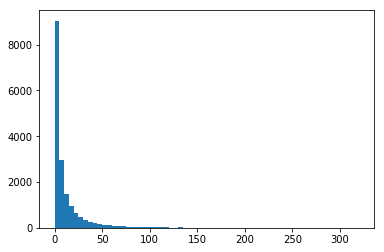

In [10]:
plt.hist(review_len, bins = range(0, max(review_len), 5))

In [11]:
reviews_detail.sample(5)

listing_id         id       date  reviewer_id reviewer_name  \
4422       4280214  101749391 2016-09-15      7490572      Danielle   
34236     13962253   93802832 2016-08-14     69570586         Yusen   
183822    30201991  423103124 2019-03-13    211352334          Phil   
141604    25494380  320444370 2018-09-09    130671548           Lin   
85723     19963584  430636000 2019-03-31     23439524         Cindy   

                                                 comments  
4422    Great and central location, Next to the Solana...  
34236   This was my first time using Airbnb for housin...  
183822               此房源位置非常好,離地鐵站3分鐘走路路程｡安靜也安全的區域,房東好溝通.  
141604  位置很方便,离北京南站超近,对于l b旅行来说交通方便的住宿必定是sh ou首选｡性价比很高...  
85723   The place is at strategic location.. like few ...

### 研究评论时间上的宏观趋势

In [27]:
review_date_df = pd.DataFrame({"date": list(reviews["date"])})

In [30]:
review_date_df["year"] = review_date_df["date"].map(lambda d: d.year)
review_date_df["month"] = review_date_df["date"].map(lambda d: d.month)
review_date_df["day"] = review_date_df["date"].map(lambda d: d.day)
review_date_df["week"] = review_date_df["date"].map(lambda d: d.strftime("%w"))

In [51]:
review_date_df["week"] = review_date_df["week"].map(lambda n : int(n)+1)

In [33]:
review_date_df.sample(3)

date  year  month  day week
14493 2018-12-28  2018     12   28    5
17749 2016-10-23  2016     10   23    0
74633 2017-06-21  2017      6   21    3

In [45]:
review_date_df["year"].value_counts(sort = True)

2018    95899
2019    51935
2017    38593
2016    12042
2015     2551
2014      624
2013      306
2012      123
2011       24
2010        2
Name: year, dtype: int64

In [46]:
# 统计关于month时，应舍弃2019年，因为2019在抓取数据时候只有四个半月
month_count = review_date_df[review_date_df["year"] < 2019]["month"].value_counts(sort = True)

In [47]:
month_count

8     18919
12    17418
10    17134
9     16167
7     15317
11    14207
6     12107
5     11566
4     10016
1      7064
2      5770
3      4479
Name: month, dtype: int64

In [52]:
week_count = review_date_df["week"].value_counts(sort = True)

In [53]:
week_count

1    42471
7    31637
2    28587
6    26779
3    24942
5    23887
4    23796
Name: week, dtype: int64

In [55]:
reviews_detail.shape[0]

202099

In [56]:
len(list(set(reviews_detail["reviewer_id"])))

171106

In [57]:
reviews_detail["reviewer_id"].value_counts()

186684246    43
21067785     35
158695647    34
99325050     32
149769588    26
140955472    26
213893643    24
6532783      23
229832388    23
196283240    23
28903457     23
117241519    21
104082034    21
3671922      21
165536239    20
16660997     20
10684339     20
228835331    20
43905550     19
50995265     19
131852797    18
1901931      18
147781167    18
127613182    17
44062450     17
201935258    17
37438677     17
96439593     17
196072820    17
236656197    17
             ..
178963722     1
37928197      1
202666797     1
77237507      1
198870274     1
155884801     1
124163328     1
126708991     1
135619838     1
207085010     1
200821761     1
146421012     1
160572694     1
19541271      1
252981398     1
25374007      1
101918006     1
86719797      1
86611851      1
156437811     1
217574848     1
49802543      1
69663466      1
226483497     1
136828200     1
124495142     1
216146883     1
43670809      1
230577432     1
180879360     1
Name: reviewer_id, Lengt

In [67]:
reviewer_count = {}
reviewer_count_df = pd.DataFrame(columns = ["count"])
for reviewer_id, group in reviews_detail.groupby(["reviewer_id"]):
    if reviewer_id in reviewer_count:
        reviewer_count[reviewer_id] += 1
    else:
        reviewer_count[reviewer_id] = 1
    reviewer_count_df.loc[reviewer_id] = reviewer_count[reviewer_id]

KeyboardInterrupt: 

In [ ]:
reviewer_count_df

In [63]:
tmp_df = reviews_detail[reviews_detail["reviewer_id"] == 21067785]
tmp_df = tmp_df.sort_values( by = ["date"], ascending = True)

In [64]:
tmp_df

listing_id         id       date  reviewer_id reviewer_name  \
57977     16900761  153126687 2017-05-20     21067785       Jasmine   
60788     17451362  154331642 2017-05-24     21067785       Jasmine   
60789     17451362  154529696 2017-05-25     21067785       Jasmine   
18906     10329046  159436555 2017-06-11     21067785       Jasmine   
71180     18511296  161126599 2017-06-17     21067785       Jasmine   
81538     19632723  167471435 2017-07-07     21067785       Jasmine   
87915     20145766  215640103 2017-12-01     21067785       Jasmine   
110261    21976030  217140807 2017-12-08     21067785       Jasmine   
27978     13212624  231202267 2018-01-31     21067785       Jasmine   
52740     16241759  233282575 2018-02-09     21067785       Jasmine   
123348    23487654  240058495 2018-03-04     21067785       Jasmine   
123347    23487624  240001731 2018-03-04     21067785       Jasmine   
66935     18044592  263387979 2018-05-12     21067785       Jasmine   
136038    24847949  277265349 2018-06-16     21067785       Jasmine   
122128    23210158  284687475 2018-07-02     21067785       Jasmine   
136074    24858098  286757137 2018-07-07     21067785       Jasmine   
145410    25948420  310750296 2018-08-20     21067785       Jasmine   
33771     13943480  312637416 2018-08-24     21067785       Jasmine   
114617    22425941  313143593 2018-08-25     21067785       Jasmine   
140857    25405623  321260738 2018-09-10     21067785       Jasmine   
157980    27445272  321675426 2018-09-11     21067785       Jasmine   
121449    23153241  327548221 2018-09-24     21067785       Jasmine   
167186    28305122  336088990 2018-10-14     21067785       Jasmine   
113254    22350049  346250122 2018-11-08     21067785       Jasmine   
103118    21407593  346522029 2018-11-09     21067785       Jasmine   
154855    27145174  346814597 2018-11-10     21067785       Jasmine   
174231    28933784  347199617 2018-11-11     21067785       Jasmine   
121451    23153241  349634878 2018-11-18     21067785       Jasmine   
128457    24151831  351771020 2018-11-24     21067785       Jasmine   
145425    25948420  358295297 2018-12-14     21067785       Jasmine   
40815     14895501  369288550 2019-01-10     21067785       Jasmine   
157997    27445272  402060860 2019-01-17     21067785       Jasmine   
170034    28574318  415581632 2019-02-23     21067785       Jasmine   
118967    22893984  418001222 2019-03-01     21067785       Jasmine   
136079    24858098  423359021 2019-03-14     21067785       Jasmine   

                                                 comments  
57977   Gloria's place is great! Convenient to public ...  
60788   My stay in Rachel's place is really good! Grea...  
60789   Really wonderful experience! I need to expand ...  
18906   位置很好,来打扫的阿姨也不错,虽然没见到房东,不过入住过程还是不错,屋子里也很干净,周边就是...  
71180   很舒服的自家小院,虽然不大但是卫生间在房间里面所以很方便,而且一楼比较凉快,就像回到自己的老...  
81538        房间很舒服,卫生间和厨房阳台也很大,干净整洁,附近交通便利,房东人也很好,期待下次入住!  
87915   Sleepy的房子很棒,看得出装修很用心,基本上生活上的用品也是一应俱全｡中间出了点小状况,...  
110261  房子非常整洁,布置的很漂亮,家里面的日常使用物品一应俱全,位置也非常好,很期待能够有机会再来...  
27978   房源本身应该是不错,但是因为行程变化,需要缩短行程,房东一直没有回复消息,也没有接受修改预定...  
52740   非常好的房子,坐落在内环胡同区域,本身房子装修的非常好,还提供美味的早餐,很推荐哦!房东是资...  
123348  非常推荐的休闲度假地!房间装修很棒,甚至有一点奢华体验,可以泡汤,休闲设施很多,重点推荐餐饮...  
123347  非常棒的入住体验!因为是来做一个团队活动,所以订了好几间,晚上一起泡汤时候觉得真的很棒,床品...  
66935   非常棒的四合院小房,房间布置和设计得很好,住起来很舒适,房间床品也很好,很喜爱这种原木设计的...  
136038  佳佳的房子非常棒!靠近核心商务区,短途出差和小住很好的选择,房间装修很有格调,入住很舒服,每...  
122128                  房屋很有装修特色,但是可能刚刚装修好,所以还有一些味道,其他还可以  
136074     佳佳的房子很棒~每次来都被冰箱里准备的零食和饮料惊呆哈哈~真的很赞!房子没话说,位置一级棒!  
145410  乐乐是非常棒的爱彼迎房东哦,房间装修有格调,干净整洁就不说了,房间里面的饮料零食一应俱全,简...  
33771   乐乐的房子是你能够想象到的最好的爱彼迎民宿之一,特别适合出差出游,你想要的便利设施一应俱全,...  
114617  房间位置很好,因为临时需要多在北京停留一晚所以临时下的预定,房源入住比较顺利,但是房间情况和...  
140857  房子和图片基本一致,住在北京的传统四合院里面,房子内有房东大大的外国朋友一起住(在院子另外一...  
157980  匆匆一晚有点可惜,凸凸的房子很棒!位置很好,小区很棒,入住是在门口储物柜取钥匙,蛮可爱的,房...  
121449  Jane的房子非常棒!小区很安全,房间的设计装修风格超级喜欢,最爱那个大大的开放式厨房和充满...  
167186  几乎每次来北京都会选择佳佳的房间,这套房源是新进装修布置的,而且入住时候可以留心观察房间的布...  
113254  饭饭的